In [ ]:
!pip install koreanize-matplotlib

import koreanize_matplotlib
%matplotlib inline

In [ ]:
import pandas as pd
import datetime

customer_info = pd.read_csv('/content/drive/MyDrive/FINAL_Team_Project_git/ML_COMMERCE/data/Customer_info.csv')
discount_info = pd.read_csv('/content/drive/MyDrive/FINAL_Team_Project_git/ML_COMMERCE/data/Discount_info.csv')
marketing_info = pd.read_csv('/content/drive/MyDrive/FINAL_Team_Project_git/ML_COMMERCE/data/Marketing_info.csv')
onlinesales_info = pd.read_csv('/content/drive/MyDrive/FINAL_Team_Project_git/ML_COMMERCE/data/Onlinesales_info.csv')
tax_info = pd.read_csv('/content/drive/MyDrive/FINAL_Team_Project_git/ML_COMMERCE/data/Tax_info.csv')
customer_buyinginfo_df = pd.read_csv('/content/drive/MyDrive/FINAL_Team_Project_git/ML_COMMERCE/data/customer_buyinginfo_df.csv', index_col=0)
shoppingcart_df = pd.read_csv('/content/drive/MyDrive/FINAL_Team_Project_git/ML_COMMERCE/data/shoppingcart_df.csv', index_col=0)
new_features_df = pd.read_csv('/content/drive/MyDrive/FINAL_Team_Project_git/ML_COMMERCE/data/cluster_input.csv', index_col=0)

- 가입날짜보다 최초거래날짜가 더 빠른 경우 분리

In [ ]:
customer_buyinginfo_df['가입날짜'] = pd.to_datetime(customer_buyinginfo_df['가입날짜'])
customer_buyinginfo_df['최초거래날짜'] = pd.to_datetime(customer_buyinginfo_df['최초거래날짜'])

In [ ]:
customer_merge = pd.merge(customer_info, customer_buyinginfo_df, on='고객ID', how='inner')
customer_merge

,고객ID,성별,고객지역,가입기간,가입날짜,최초거래날짜,최근거래날짜,구매횟수,구매제품수,구매원가,할인가,배송료,총결제금액,평균결제금액,평균할인차액,평균할인비율,구매제품평균금액
0,USER_1358,남,Chicago,12,2019-01-01,2019-01-01,2019-01-26,177,1133,38520.24,37377.56,1749.28,39126.84,221.06,-6.46,0.03,32.99
1,USER_0190,남,California,43,2016-04-19,2019-01-01,2019-12-18,26,175,3360.52,3032.86,200.46,3233.32,124.36,-12.60,0.10,17.33
2,USER_0066,남,Chicago,33,2017-01-31,2019-01-01,2019-08-02,15,155,2671.90,2563.56,195.70,2759.26,183.95,-7.22,0.04,16.54
3,USER_0345,여,California,30,2017-05-23,2019-01-01,2019-01-01,1,1,1.46,1.46,6.50,7.96,7.96,0.00,0.00,1.46
4,USER_0683,남,California,49,2015-12-01,2019-01-01,2019-08-30,6,15,1150.17,903.36,64.38,967.74,161.29,-41.14,0.26,60.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_0513,여,New York,41,2016-07-05,2019-12-30,2019-12-31,5,29,559.89,491.44,31.50,522.94,104.59,-13.69,0.13,16.95
1464,USER_0167,여,Chicago,48,2016-01-05,2019-12-31,2019-12-31,14,35,3272.39,3150.20,103.99,3254.19,232.44,-8.73,0.04,90.01
1465,USER_0845,남,New Jersey,19,2018-04-17,2019-12-31,2019-12-31,3,10,810.39,803.39,19.50,822.89,274.30,-2.33,0.01,80.34
1466,USER_0504,여,New York,45,2016-02-02,2019-12-31,2019-12-31,6,11,1198.59,1131.15,39.00,1170.15,195.02,-11.24,0.06,102.83


In [ ]:
customer_merge_anomaly = customer_merge[customer_merge['가입날짜'] > customer_merge['최초거래날짜']]
customer_merge_normal = customer_merge[customer_merge['가입날짜'] <= customer_merge['최초거래날짜']]

# 1. Cohort Analysis

- 최초거래월을 기준으로 코호트 분석 진행

## 1. 정상 데이터

- 월 단위

In [ ]:
customer_merge_normal = customer_merge_normal.reset_index(drop=True)
customer_merge_normal

,고객ID,성별,고객지역,가입기간,가입날짜,최초거래날짜,최근거래날짜,구매횟수,구매제품수,구매원가,할인가,배송료,총결제금액,평균결제금액,평균할인차액,평균할인비율,구매제품평균금액
0,USER_1358,남,Chicago,12,2019-01-01,2019-01-01,2019-01-26,177,1133,38520.24,37377.56,1749.28,39126.84,221.06,-6.46,0.03,32.99
1,USER_0190,남,California,43,2016-04-19,2019-01-01,2019-12-18,26,175,3360.52,3032.86,200.46,3233.32,124.36,-12.60,0.10,17.33
2,USER_0066,남,Chicago,33,2017-01-31,2019-01-01,2019-08-02,15,155,2671.90,2563.56,195.70,2759.26,183.95,-7.22,0.04,16.54
3,USER_0345,여,California,30,2017-05-23,2019-01-01,2019-01-01,1,1,1.46,1.46,6.50,7.96,7.96,0.00,0.00,1.46
4,USER_0683,남,California,49,2015-12-01,2019-01-01,2019-08-30,6,15,1150.17,903.36,64.38,967.74,161.29,-41.14,0.26,60.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,USER_0513,여,New York,41,2016-07-05,2019-12-30,2019-12-31,5,29,559.89,491.44,31.50,522.94,104.59,-13.69,0.13,16.95
1341,USER_0167,여,Chicago,48,2016-01-05,2019-12-31,2019-12-31,14,35,3272.39,3150.20,103.99,3254.19,232.44,-8.73,0.04,90.01
1342,USER_0845,남,New Jersey,19,2018-04-17,2019-12-31,2019-12-31,3,10,810.39,803.39,19.50,822.89,274.30,-2.33,0.01,80.34
1343,USER_0504,여,New York,45,2016-02-02,2019-12-31,2019-12-31,6,11,1198.59,1131.15,39.00,1170.15,195.02,-11.24,0.06,102.83


In [ ]:
customer_normal = pd.merge(customer_merge_normal[['고객ID', '성별', '고객지역', '가입날짜', '최초거래날짜']], onlinesales_info, on='고객ID', how='left')
customer_normal

,고객ID,성별,고객지역,가입날짜,최초거래날짜,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47963,USER_0504,여,New York,2016-02-02,2019-12-31,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
47964,USER_0504,여,New York,2016-02-02,2019-12-31,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
47965,USER_0504,여,New York,2016-02-02,2019-12-31,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
47966,USER_0562,여,California,2019-04-16,2019-12-31,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


- 첫 구매일로부터 몇 달째 구매인가?

In [ ]:
customer_normal['cohortIndex'] = customer_normal['거래날짜'].dt.month - customer_normal['최초거래날짜'].dt.month
customer_normal

,고객ID,성별,고객지역,가입날짜,최초거래날짜,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,cohortIndex
0,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0
1,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0
2,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,0
3,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,0
4,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47963,USER_0504,여,New York,2016-02-02,2019-12-31,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,0
47964,USER_0504,여,New York,2016-02-02,2019-12-31,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,0
47965,USER_0504,여,New York,2016-02-02,2019-12-31,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,0
47966,USER_0562,여,California,2019-04-16,2019-12-31,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,0


- 코호트 월별 빈도수

In [ ]:
customer_normal['cohortIndex'].value_counts()

0     29197
5      3031
3      2616
6      2380
4      2011
2      1994
7      1806
1      1770
8       985
9       874
11      695
10      609
Name: cohortIndex, dtype: int64

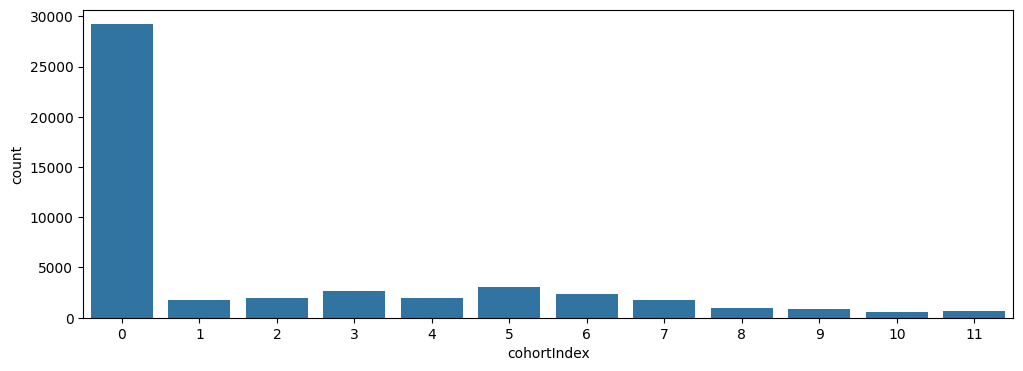

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))
sns.countplot(data = customer_normal, x = 'cohortIndex');

- --> 최초거래날짜와 같은 월에 구매가 가장 많이 일어나고, 점차 개월이 지나갈수록 구매수가 줄어듦
  - --> 1달 차이에서 기하급수적으로 구매수가 줄어듦
  - --> 3달 차이와 5달 차이에서 비교적 높은 구매수를 보임

- 월별 잔존 빈도 구하기

- 첫구매월과 cohortIndex에 따라 몇명이 구매를 하고 있는지 확인 가능

In [ ]:
customer_normal['최초거래월'] = customer_normal['최초거래날짜'].astype(str).str[:7]

In [ ]:
customer_normal.groupby(['최초거래월', 'cohortIndex'])['고객ID'].nunique()

최초거래월    cohortIndex
2019-01  0              186
         1               11
         2               21
         3               29
         4               22
                       ... 
2019-10  1                5
         2                4
2019-11  0               68
         1                7
2019-12  0              106
Name: 고객ID, Length: 78, dtype: int64

In [ ]:
# unstack : 마지막 인덱스값을 컬럼으로

customer_normal_count = customer_normal.groupby(['최초거래월', 'cohortIndex'])['고객ID'].nunique().unstack()
customer_normal_count

cohortIndex,0,1,2,3,4,5,6,7,8,9,10,11
최초거래월,,,,,,,,,,,,
2019-01,186.0,11.0,21.0,29.0,22.0,40.0,33.0,41.0,19.0,26.0,17.0,31.0
2019-02,86.0,7.0,8.0,15.0,15.0,19.0,16.0,14.0,12.0,10.0,14.0,NaN
2019-03,155.0,15.0,30.0,23.0,26.0,29.0,20.0,18.0,14.0,16.0,NaN,NaN
2019-04,144.0,13.0,21.0,20.0,17.0,13.0,9.0,14.0,12.0,NaN,NaN,NaN
2019-05,103.0,12.0,8.0,13.0,9.0,13.0,13.0,8.0,NaN,NaN,NaN,NaN
2019-06,122.0,17.0,21.0,10.0,11.0,13.0,10.0,NaN,NaN,NaN,NaN,NaN
2019-07,86.0,11.0,3.0,5.0,10.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,131.0,14.0,15.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,75.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- --> 2019년 1월에 첫구매가 이루어진 사람 중 2019년 12월에 31명으로 줄어들었음

In [ ]:
#plt.colormaps()

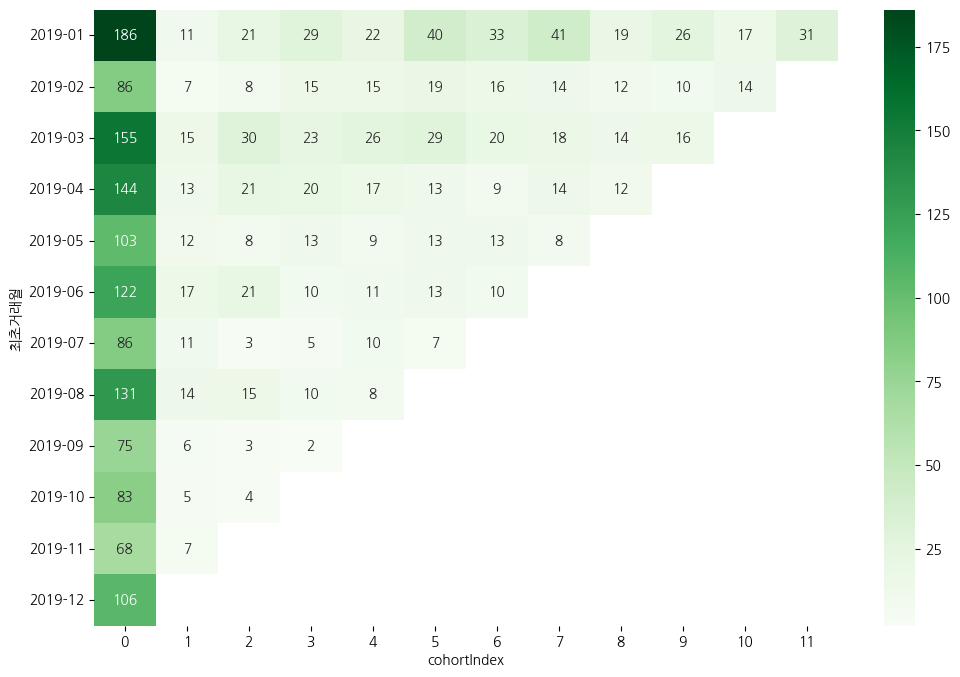

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(customer_normal_count, cmap='Greens', annot=True, fmt='.0f');

- 월별 신규 유입 고객 수
  - cohortIndex = 0인 고객 수

In [ ]:
customer_normal_count[0]

최초거래월
2019-01    186.0
2019-02     86.0
2019-03    155.0
2019-04    144.0
2019-05    103.0
2019-06    122.0
2019-07     86.0
2019-08    131.0
2019-09     75.0
2019-10     83.0
2019-11     68.0
2019-12    106.0
Name: 0, dtype: float64

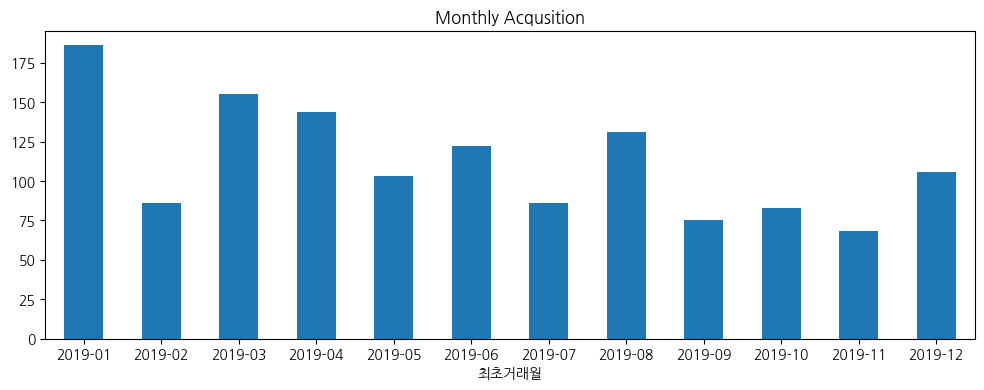

In [ ]:
customer_normal_count[0].plot(kind='bar', figsize=(12,4), rot=0, title='Monthly Acqusition');

- --> 2019년 1월부터 2019년 12월까지 월별로 신규 유입한 고객수에 대한 그래프

- 잔존율 확인
  - 나머지 달에 대한 고객수를 최초거래월로 나눠줌

In [ ]:
customer_normal_norm = customer_normal_count.div(customer_normal_count[0], axis=0)
customer_normal_norm

cohortIndex,0,1,2,3,4,5,6,7,8,9,10,11
최초거래월,,,,,,,,,,,,
2019-01,1.0,0.059140,0.112903,0.155914,0.118280,0.215054,0.177419,0.220430,0.102151,0.139785,0.091398,0.166667
2019-02,1.0,0.081395,0.093023,0.174419,0.174419,0.220930,0.186047,0.162791,0.139535,0.116279,0.162791,NaN
2019-03,1.0,0.096774,0.193548,0.148387,0.167742,0.187097,0.129032,0.116129,0.090323,0.103226,NaN,NaN
2019-04,1.0,0.090278,0.145833,0.138889,0.118056,0.090278,0.062500,0.097222,0.083333,NaN,NaN,NaN
2019-05,1.0,0.116505,0.077670,0.126214,0.087379,0.126214,0.126214,0.077670,NaN,NaN,NaN,NaN
2019-06,1.0,0.139344,0.172131,0.081967,0.090164,0.106557,0.081967,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.127907,0.034884,0.058140,0.116279,0.081395,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.106870,0.114504,0.076336,0.061069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.080000,0.040000,0.026667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


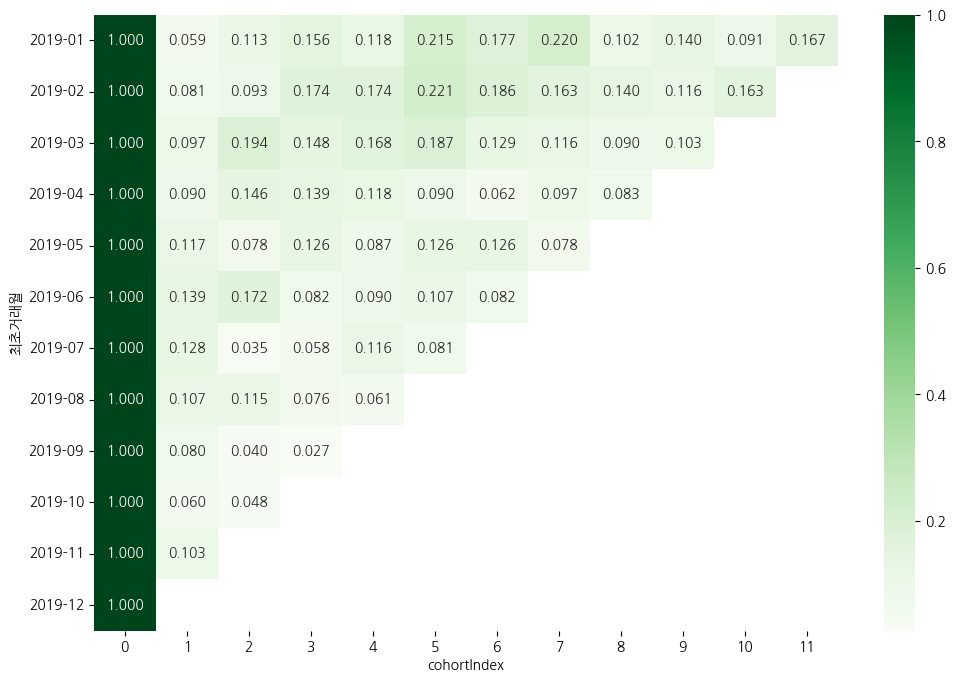

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(customer_normal_norm, cmap='Greens', annot=True, fmt='.3f');

- --> 잔존율이 적더라도 잔존해 있는 고객들이 매출을 많이 차지하고 있다면..?

- 월별 매출액 리텐션

In [ ]:
# 총제품금액 : 평균금액 * 수량

customer_normal['총제품금액'] = customer_normal['평균금액'] * customer_normal['수량']

In [ ]:
customer_normal_totalprice = customer_normal.groupby(['최초거래월', 'cohortIndex'])['총제품금액'].sum().unstack()
customer_normal_totalprice

cohortIndex,0,1,2,3,4,5,6,7,8,9,10,11
최초거래월,,,,,,,,,,,,
2019-01,343737.27,32268.21,43957.84,110432.35,28642.93,48378.41,83006.31,45277.36,31558.61,40956.01,34032.81,85368.44
2019-02,236111.19,8095.60,12606.94,19716.27,19847.17,27715.46,17700.42,40687.42,17146.07,24612.53,38617.42,NaN
2019-03,262040.44,35025.48,30064.26,28956.49,30183.73,62051.90,44576.37,27062.22,23580.12,29434.11,NaN,NaN
2019-04,213419.52,23120.37,15142.00,24800.03,25130.90,30036.30,14794.45,52657.92,18185.16,NaN,NaN,NaN
2019-05,174474.57,6872.73,11875.61,14110.62,13249.91,36035.79,35002.83,11455.74,NaN,NaN,NaN,NaN
2019-06,169776.34,10393.97,12619.35,14792.00,9955.26,34389.35,15468.97,NaN,NaN,NaN,NaN,NaN
2019-07,126124.91,14016.85,7104.57,14597.05,23308.51,26947.50,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,190119.85,10715.23,11079.85,28956.08,16715.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,140436.33,1875.06,2556.36,662.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


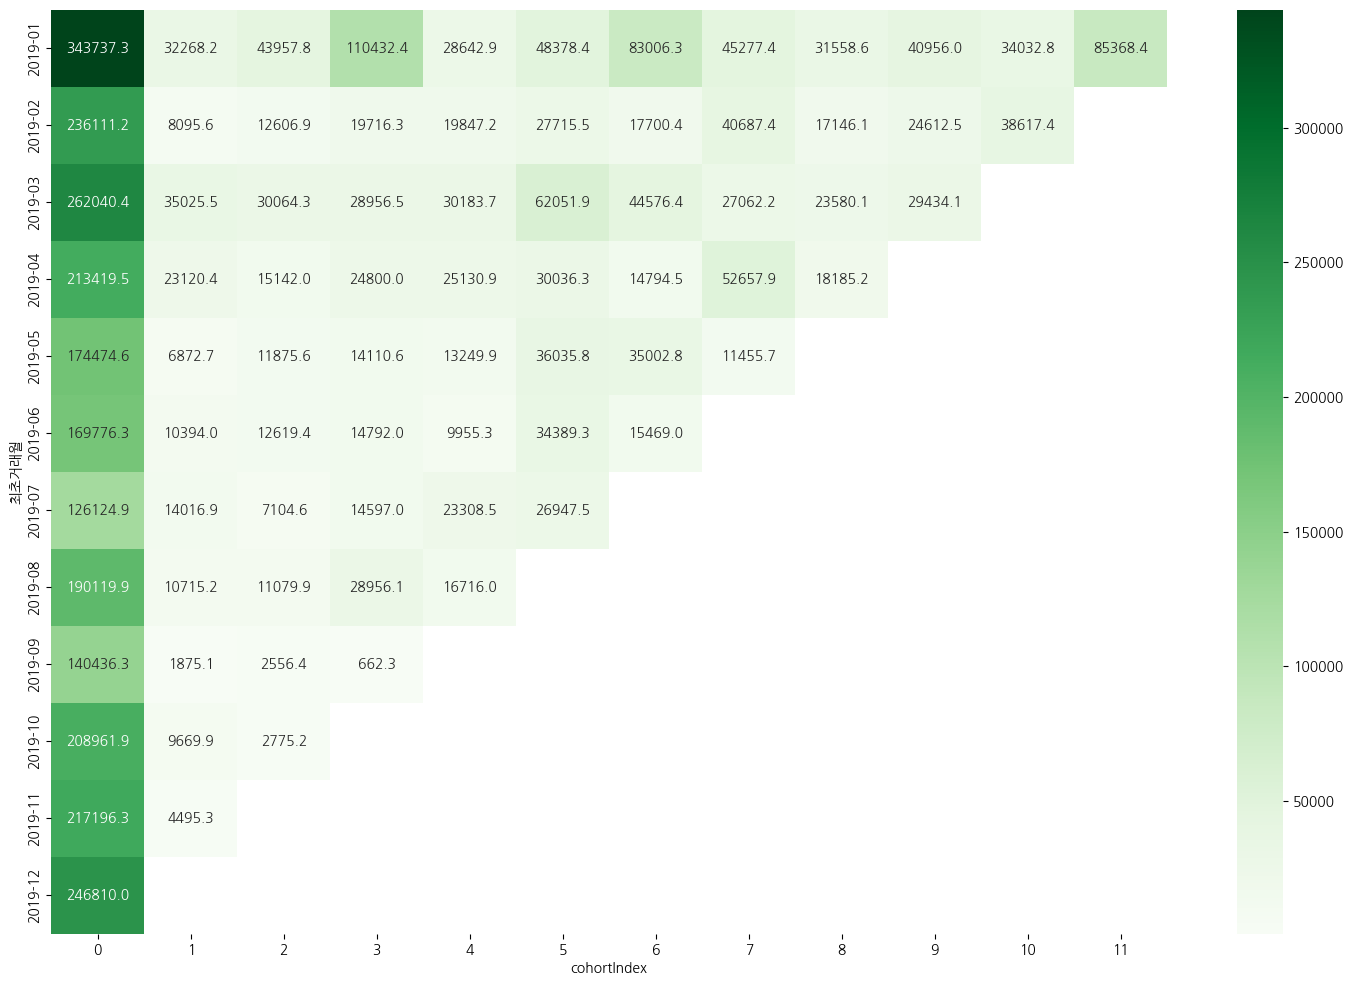

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(customer_normal_totalprice, cmap='Greens', annot=True, fmt='.1f'); # .0f : 천단위로 콤마 지정

- --> 2019년 1월에 첫구매가 이루어진 고객들이 꾸준히 많은 매출을 담당하고 있음
  - --> 특히, 4월, 7월, 12월의 매출을 많이 내고 있음
  - --> 2019년 1월에 첫구매가 이루어진 고객들이 어느정도 충성고객들이 많이 존재함

- --> 2019년 3월에 첫구매가 이루어진 고객들이 8월의 매출에 그나마 조금 기여하고 있음
  - --> 이유가 뭘까 분석 필요

- --> 리텐션
  - --> 고객이 몇명 남아있느냐, 남아 있는 고객들이 매출액의 얼마를 내고 있는지

## 2. 정상 데이터 + 비정상 데이터

In [ ]:
len(customer_anomaly['고객ID'].unique())

123

- 2019년도에 대한 거래내역만 확인할 수 있고 최초거래월에 대해서 코호트 분석 실행할 것이므로 가입기간 컬럼 무시
- --> 비정상 데이터 : 최초거래날짜에 가입이 이루어졌다고 가정

In [ ]:
customer = pd.merge(customer_merge[['고객ID', '성별', '고객지역', '가입날짜', '최초거래날짜']], onlinesales_info, on='고객ID', how='left')
customer

,고객ID,성별,고객지역,가입날짜,최초거래날짜,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,여,New York,2016-02-02,2019-12-31,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,여,New York,2016-02-02,2019-12-31,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,여,New York,2016-02-02,2019-12-31,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,여,California,2019-04-16,2019-12-31,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


- 첫구매일로 부터 몇달째 구매인가?

In [ ]:
customer['cohortIndex'] = customer['거래날짜'].dt.month - customer['최초거래날짜'].dt.month
customer

,고객ID,성별,고객지역,가입날짜,최초거래날짜,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,cohortIndex
0,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0
1,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0
2,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,0
3,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,0
4,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,여,New York,2016-02-02,2019-12-31,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,0
52920,USER_0504,여,New York,2016-02-02,2019-12-31,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,0
52921,USER_0504,여,New York,2016-02-02,2019-12-31,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,0
52922,USER_0562,여,California,2019-04-16,2019-12-31,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,0


- 코호트 인덱스별 빈도수

In [ ]:
customer['cohortIndex'].value_counts()

0     32033
5      3538
3      2782
6      2520
4      2251
2      2175
7      2097
1      1941
8      1107
9      1021
11      749
10      710
Name: cohortIndex, dtype: int64

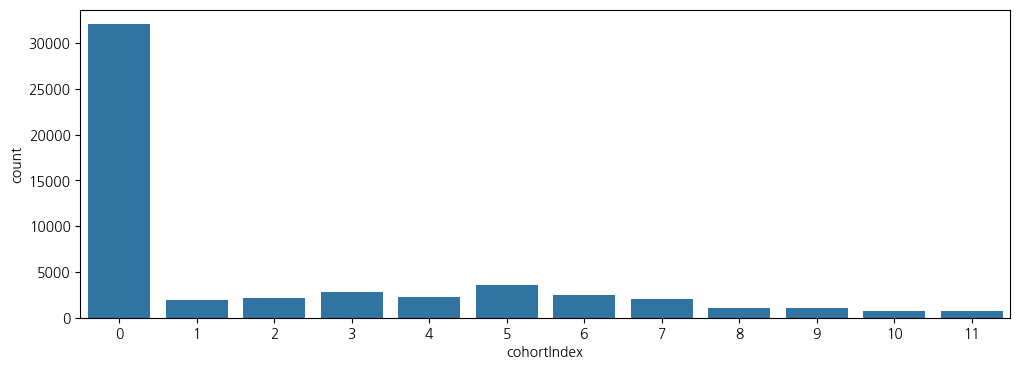

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))
sns.countplot(data = customer, x = 'cohortIndex');

- --> 최초거래날짜와 같은 월에 구매가 가장 많이 일어나고, 점차 개월이 지나갈수록 구매수가 줄어듦
  - --> 1달 차이에서 기하급수적으로 구매수가 줄어듦
  - --> 첫구매월롤부터 1달 뒤에 해당하는 월의 거래수를 늘리는 마케팅 전략을 세우면 점차 개월수 차이별로 구매건수가 위 그래프보다는 높아질 것임


- 월별 잔존 빈도 확인

In [ ]:
customer['최초거래월'] = customer['최초거래날짜'].astype(str).str[:7]

In [ ]:
customer_count = customer.groupby(['최초거래월', 'cohortIndex'])['고객ID'].nunique().unstack()

In [ ]:
customer_count

cohortIndex,0,1,2,3,4,5,6,7,8,9,10,11
최초거래월,,,,,,,,,,,,
2019-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
2019-06,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07,94.0,13.0,4.0,6.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,135.0,14.0,15.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


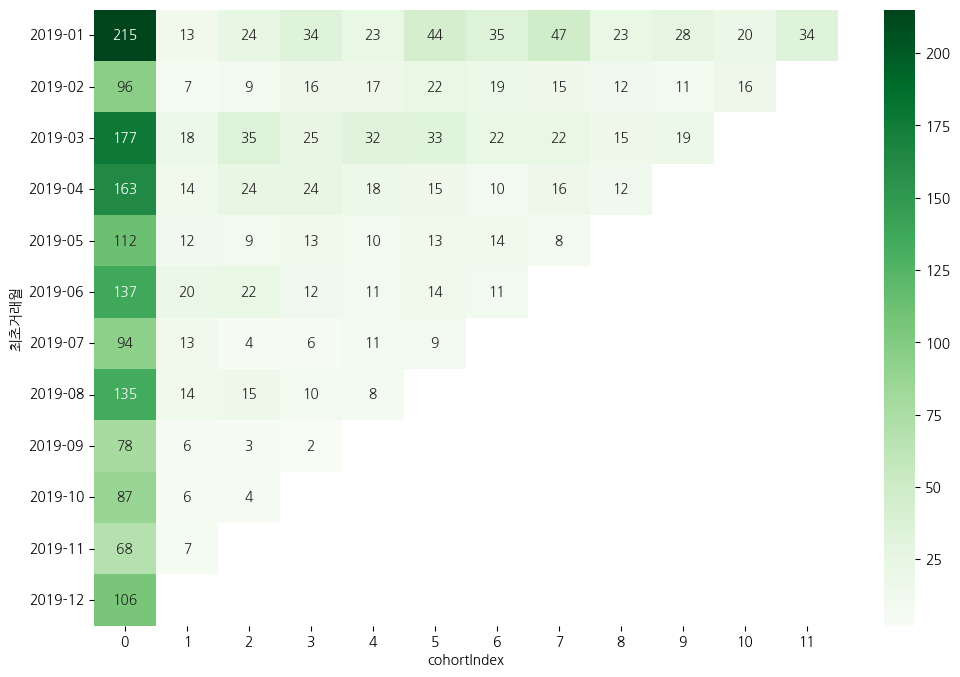

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(customer_count, cmap='Greens', annot=True, fmt='.0f');

- --> 2019년 1월에 첫구매가 이루어진 고객은 6월, 8월에 그나마 리텐션이 높다고 볼 수 있음

- 월별 신규 유입 고객 수

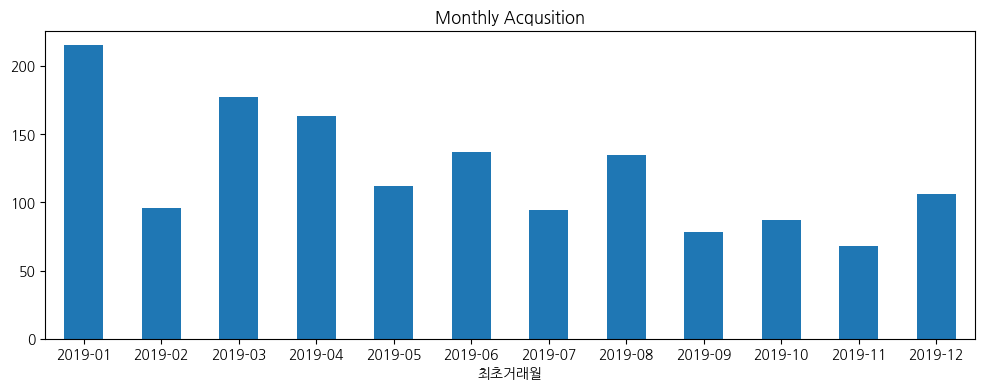

In [ ]:
customer_count[0].plot(kind='bar', figsize=(12,4), rot=0, title='Monthly Acqusition');

- --> 1월, 3월, 6월, 8월, 10월, 12월에 신규 거래 고객수가 높아짐

- 마케팅 비용 확인

In [ ]:
marketing_info['날짜'] = pd.to_datetime(marketing_info['날짜']).astype(str).str[:7]

In [ ]:
marketing_info['총마케팅비용'] = marketing_info['오프라인비용'] + marketing_info['온라인비용']

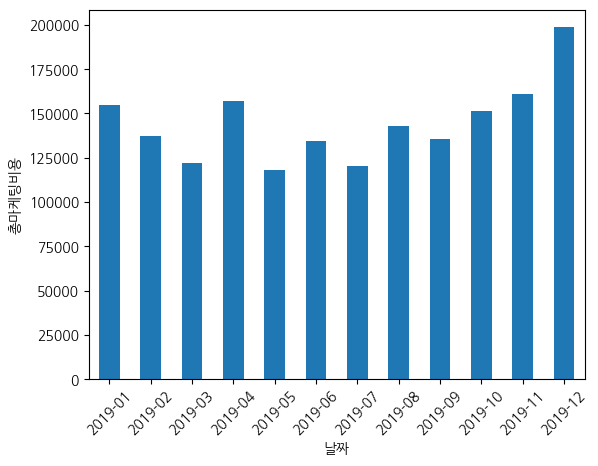

In [ ]:
marketing_info.groupby(['날짜'])['총마케팅비용'].sum().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('총마케팅비용');

- --> 3월은 마케팅비용대비 신규 거래 고객수가 많은 편
- --> 4월, 11월, 12월은 마케팅비용대비 신규 거래 고객수가 적은 편

- --> 3월, 11월을 제외하고는 대체적으로 전월대비 마케팅비용이 높아질수록 해당 월에 신규 거래 고객수가 증가함을 볼 수 있음
  - --> 3월 : 전월보다 마케팅비용 낮아졌음에도 신규 거래 고객 수 많아짐
  - --> 11월 : 전월보다 마케팅비용 높아졌음에도 신규 거래 고객 수 줄어듦
    - --> 3월 : 봄학기 영향? 혹은 마케팅 효과가 좋다?
    - --> 11월 : 블랙프라이데이 광고를 하지 않아도 사람들에게 11월은 블랙프라이데이 행사기간이라는 것이 각인되어있나?

- 잔존율 확인

In [ ]:
customer_norm = customer_count.div(customer_count[0], axis=0)
customer_norm

cohortIndex,0,1,2,3,4,5,6,7,8,9,10,11
최초거래월,,,,,,,,,,,,
2019-01,1.0,0.060465,0.111628,0.158140,0.106977,0.204651,0.162791,0.218605,0.106977,0.130233,0.093023,0.15814
2019-02,1.0,0.072917,0.093750,0.166667,0.177083,0.229167,0.197917,0.156250,0.125000,0.114583,0.166667,NaN
2019-03,1.0,0.101695,0.197740,0.141243,0.180791,0.186441,0.124294,0.124294,0.084746,0.107345,NaN,NaN
2019-04,1.0,0.085890,0.147239,0.147239,0.110429,0.092025,0.061350,0.098160,0.073620,NaN,NaN,NaN
2019-05,1.0,0.107143,0.080357,0.116071,0.089286,0.116071,0.125000,0.071429,NaN,NaN,NaN,NaN
2019-06,1.0,0.145985,0.160584,0.087591,0.080292,0.102190,0.080292,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.138298,0.042553,0.063830,0.117021,0.095745,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.103704,0.111111,0.074074,0.059259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.076923,0.038462,0.025641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


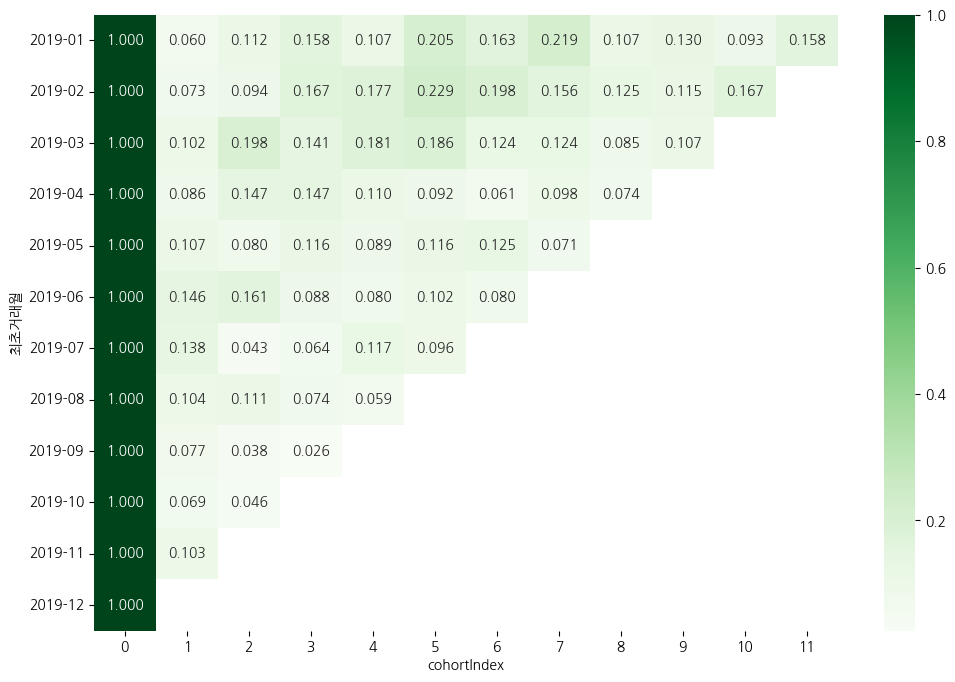

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(customer_norm, cmap='Greens', annot=True, fmt='.3f');

- --> 첫구매가 이루어진 달에서 그 다음달로 넘어가면 잔존율이 급격하게 낮아짐
  - --> 첫구매한 달의 바로 다음 달에도 구매가 이어질 수 있도록 잔존율을 높일 수 있는 방안 도입 필요
    - --> 재방문을 위한 쿠폰 발행?


- --> 6월달에 첫구매가 이루어진 고객 그룹에서 그 다음달 고객 유지율이 높은 편
  - --> 독립기념일을 기준으로 상반기 결산 세일(6월 말 ~ 8월 초) 떄문..?

- 월별 매출액 리텐션

In [ ]:
# 총제품금액 : 평균금액 * 수량

customer['총제품금액'] = customer['평균금액'] * customer['수량']

customer_totalprice = customer.groupby(['최초거래월', 'cohortIndex'])['총제품금액'].sum().unstack()
customer_totalprice

cohortIndex,0,1,2,3,4,5,6,7,8,9,10,11
최초거래월,,,,,,,,,,,,
2019-01,403624.58,39230.64,46645.94,114342.41,29081.40,51392.43,83164.89,49687.83,40313.12,45824.79,40757.46,93254.57
2019-02,271589.16,8095.60,12709.89,21995.59,23458.86,41188.56,22313.65,44942.13,17146.07,28988.81,47910.20,NaN
2019-03,294866.55,41053.03,36365.25,30603.93,46287.73,70783.91,47920.00,39753.48,24759.69,36501.82,NaN,NaN
2019-04,233513.09,23132.37,16597.02,29717.78,25249.90,30148.90,15698.45,57088.59,18185.16,NaN,NaN,NaN
2019-05,197188.81,6872.73,11887.83,14110.62,17265.29,36035.79,37881.79,11455.74,NaN,NaN,NaN,NaN
2019-06,192156.41,10454.74,12707.64,15341.33,9955.26,36710.35,15475.08,NaN,NaN,NaN,NaN,NaN
2019-07,149936.54,14812.07,7331.90,14796.05,24362.10,29016.88,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,191544.75,10715.23,11079.85,28956.08,16715.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,146570.50,1875.06,2556.36,662.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


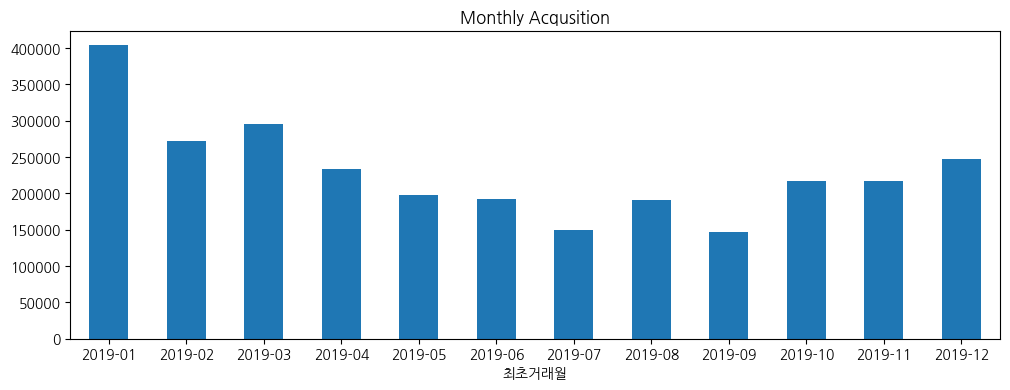

In [ ]:
customer_totalprice[0].plot(kind='bar', figsize=(12,4), rot=0, title='Monthly Acqusition');

- --> 3월에 첫구매가 이루어진 고객 그룹은 마케팅비용 대비 2월에 첫구매가 이루어진 고객 그룹에 비해 고객수도 많고 매출도 높음

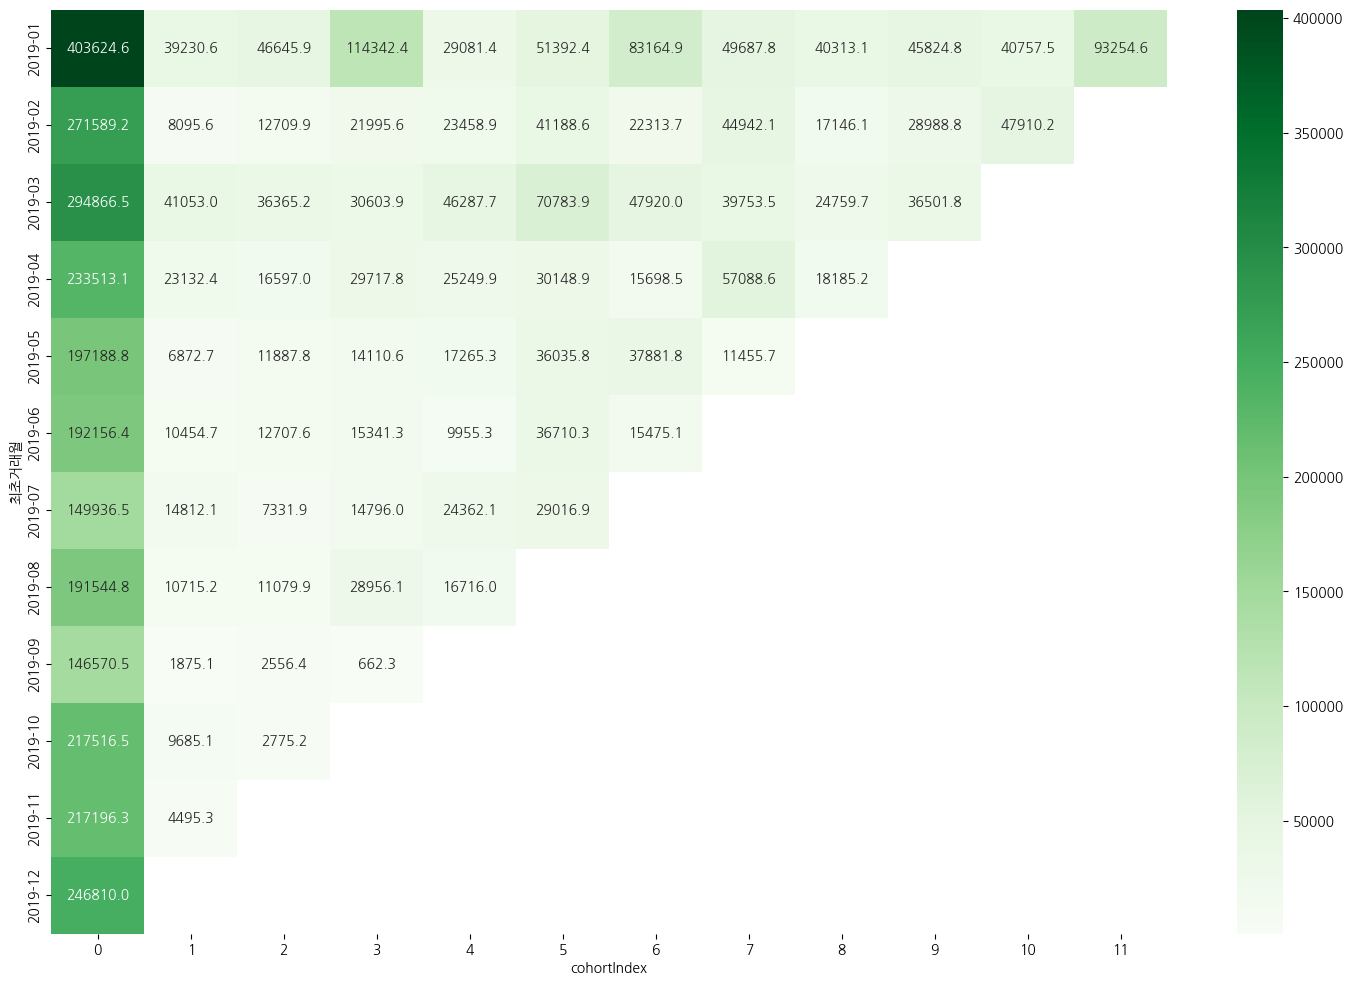

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(customer_totalprice, cmap='Greens', annot=True, fmt='.1f'); # .0f : 천단위로 콤마 지정

- --> 최초 거래달과 동일한 달에 거래한 고객 수도 많고, 매출도 높음
  - --> 특히 2019년 1월에 첫구매가 이루어진 고객들이 꾸준히 많은 매출을 담당하고 있음
  - --> 특히, 4월, 7월, 12월의 매출을 많이 내고 있음
  - --> 2019년 1월에 첫구매가 이루어진 고객들이 어느정도 충성고객들이 많이 존재함
    - --> 1월에 첫구매가 이루어진 고객 그룹에 대해 마케팅 전략 필요
--> 2019년 3월에 첫구매가 이루어진 고객들이 8월의 매출에 그나마 조금 기여하고 있음
  - --> 가을학기 영향..?

- 2019년 1월에 첫구매가 이루어진 고객 그룹 확인

In [ ]:
customer[customer['최초거래월'] == '2019-01'].groupby(['고객지역'])['고객ID'].nunique()

고객지역
California       76
Chicago          59
New Jersey       23
New York         43
Washington DC    14
Name: 고객ID, dtype: int64

In [ ]:
high_customer_jan = customer[customer['최초거래월'] == '2019-01'].groupby(['고객ID'])['총제품금액'].sum().reset_index()
high_customer_jan

,고객ID,총제품금액
0,USER_0025,5600.17
1,USER_0026,13829.98
2,USER_0033,13907.84
3,USER_0034,11417.33
4,USER_0066,2361.48
...,...,...
210,USER_1438,558.48
211,USER_1442,3775.60
212,USER_1454,90.75
213,USER_1456,2482.02


In [ ]:
high_customer_jan = customer[customer['고객ID'].isin(high_customer_jan[high_customer_jan['총제품금액'] > 10000]['고객ID'].values)]
high_customer_jan

,고객ID,성별,고객지역,가입날짜,최초거래날짜,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,cohortIndex,최초거래월,총제품금액
0,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,0,2019-01,153.71
1,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,0,2019-01,153.71
2,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,0,2019-01,2.05
3,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,0,2019-01,87.65
4,USER_1358,남,Chicago,2019-01-01,2019-01-01,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,0,2019-01,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9280,USER_0675,남,California,2019-04-16,2019-01-26,Transaction_19829,2019-10-27,Product_0231,Apparel,1,4.75,6.0,Used,9,2019-01,4.75
9281,USER_0675,남,California,2019-04-16,2019-01-26,Transaction_19829,2019-10-27,Product_0904,Office,1,2.99,6.0,Clicked,9,2019-01,2.99
9282,USER_0675,남,California,2019-04-16,2019-01-26,Transaction_19830,2019-10-27,Product_0983,Nest-USA,1,119.00,6.0,Clicked,9,2019-01,119.00
9283,USER_0675,남,California,2019-04-16,2019-01-26,Transaction_19830,2019-10-27,Product_0990,Nest,1,199.00,6.0,Used,9,2019-01,199.00


In [ ]:
high_customer_jan.groupby(['고객ID', '제품카테고리'])['수량'].sum().reset_index().sort_values('수량', ascending=False)

,고객ID,제품카테고리,수량
49,USER_0118,Office,1489
160,USER_0736,Office,1184
150,USER_0736,Drinkware,1082
9,USER_0026,Office,1018
38,USER_0118,Drinkware,931
...,...,...,...
113,USER_0643,Android,1
64,USER_0205,Waze,1
94,USER_0563,Android,1
119,USER_0643,Fun,1


- 고객당 평균 매출액

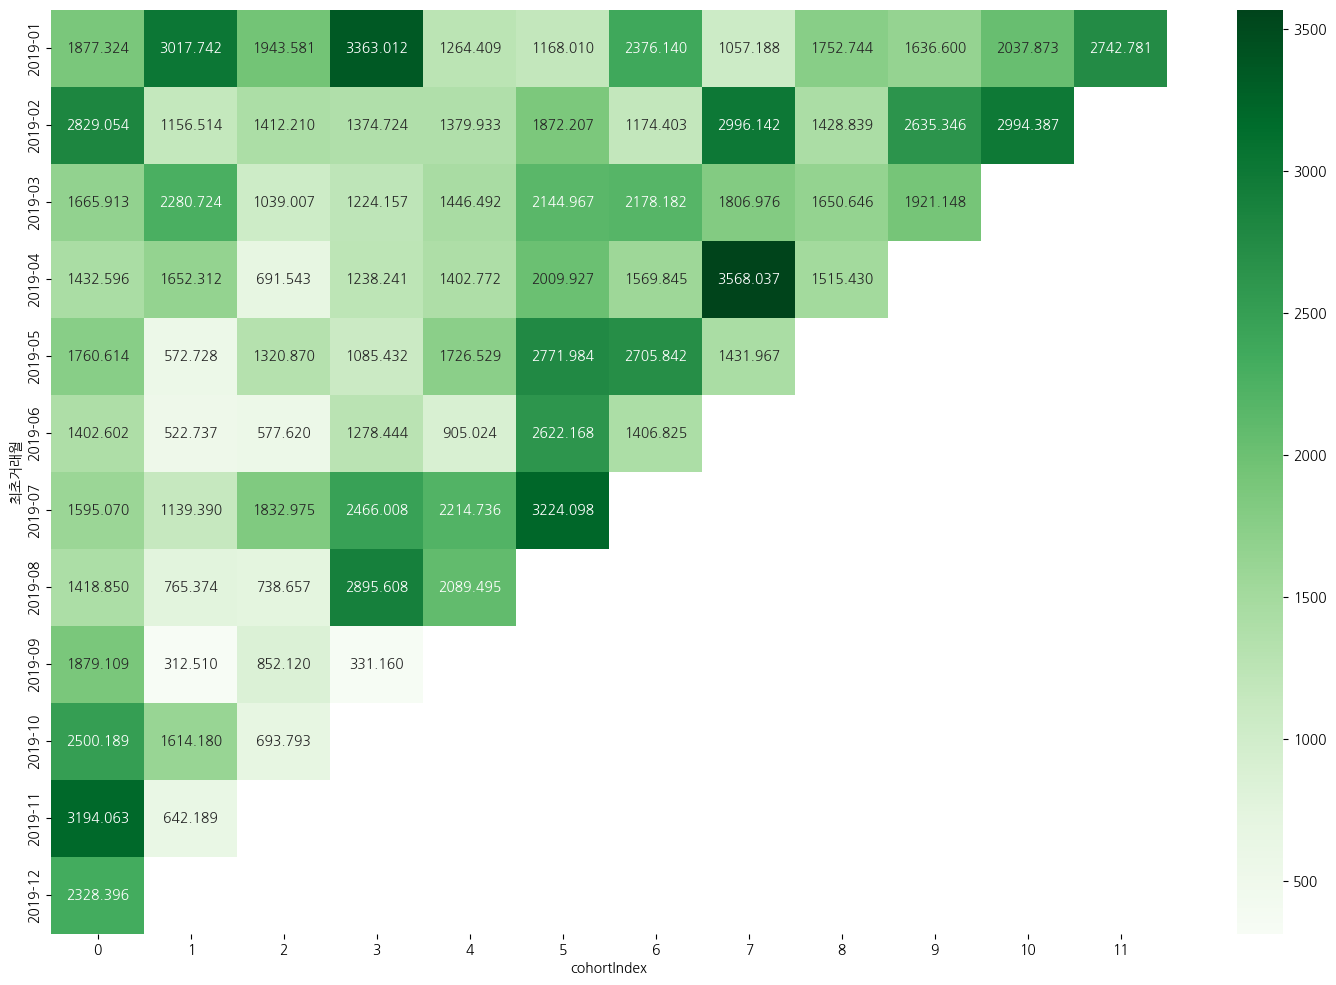

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(customer_totalprice.div(customer_count), cmap='Greens', annot=True, fmt='.3f'); # .0f : 천단위로 콤마 지정

- --> 4월에 첫구매가 이루어진 고객 그룹에서 11월에 고객당 평균 매출액이 가장 높음
- --> 11월에 첫구매가 이루어진 고객 그룹에서 고객당 평균 매출액이 가장 높았음
  - --> 블랙프라이데이 영향?
- --> 11월에 해당하는 매출 중에서 4월에 첫구매가 이루어진 고객 그룹의 고객당 평균 매출액이 가장 높았음
  - --> 4월 : 굿프라이데이
  - --> 11월 : 블랙프라이데이
  - --> 큰 행사기간에 많이 반응하는 그룹?
  - https://blog.naver.com/directpang/220131117386